In [ ]:
from layers.linear_layer import LinearLayer
from layers.sparse_layer import SparseLayer
from nets.fcnn import *
from utilis.activations import *
import matplotlib.pyplot as plt
import utilis.mnist.mnist_helper as mh
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.io


ModuleNotFoundError: No module named 'layers'

In [ ]:
img_size = 28
num_hidden = 100
k = 20
learning_rate = 0.01
epochs = 10000
batch_size = 256
print_epochs = 1000
num_test_examples = 10

helper = mh.MnistHelper()
train_lbl, train_img, test_lbl, test_img = helper.get_data()

x_data = train_img.reshape(-1, img_size * img_size) / np.float32(256)
test_data = test_img.reshape(-1, img_size * img_size) / np.float32(256)

layers = [
    # LinearLayer(name="input", n_in=x_data.shape[1], n_out=num_hidden, activation=sigmoid_function),
    SparseLayer(name="hidden 1", n_in=x_data.shape[1], n_out=num_hidden,
                activation=sigmoid_function, num_k_sparse=k),
    LinearLayer(name="output", n_in=num_hidden, n_out=x_data.shape[1], activation=sigmoid_function)
]

nn = FCNeuralNet(layers=layers, cost_func=subtract_err)
nn.print_network()

nn.train(x_data, x_data, learning_rate=learning_rate, epochs=epochs,
         batch_size=batch_size, print_epochs=print_epochs)

network:
layer - hidden 1: weights: (784, 100)
layer - output: weights: (100, 784)
training start
epochs: 1000, loss: 0.0690, lr: 0.010000
epochs: 2000, loss: 0.0613, lr: 0.010000
epochs: 3000, loss: 0.0572, lr: 0.010000
epochs: 4000, loss: 0.0586, lr: 0.010000
epochs: 5000, loss: 0.0578, lr: 0.010000
epochs: 6000, loss: 0.0539, lr: 0.010000
epochs: 7000, loss: 0.0516, lr: 0.010000
epochs: 8000, loss: 0.0527, lr: 0.010000
epochs: 9000, loss: 0.0524, lr: 0.010000
epochs: 10000, loss: 0.0548, lr: 0.010000
training complete, elapsed time: 00:03:52


{'train_loss': [np.float64(0.49556402609766176),
  np.float64(0.3965459407334663),
  np.float64(0.31690154669971654),
  np.float64(0.25376057120714635),
  np.float64(0.21104314345383277),
  np.float64(0.18135594106257064),
  np.float64(0.16479737201088188),
  np.float64(0.1547592168516513),
  np.float64(0.15215909252008644),
  np.float64(0.1482993656825141),
  np.float64(0.1452942365687432),
  np.float64(0.1471802044157992),
  np.float64(0.14166865495695397),
  np.float64(0.14451529638109756),
  np.float64(0.14360365820122664),
  np.float64(0.14369600036441915),
  np.float64(0.14316847500902327),
  np.float64(0.14722211404512725),
  np.float64(0.1366882086666137),
  np.float64(0.14155620677462988),
  np.float64(0.14127253209274673),
  np.float64(0.142564475434951),
  np.float64(0.13825123397813266),
  np.float64(0.1364956401349136),
  np.float64(0.13215246386526355),
  np.float64(0.13211933507398058),
  np.float64(0.13045173371226934),
  np.float64(0.131739355524624),
  np.float64(0.13

In [ ]:
# Encode and decode images from test set and visualize their reconstruction.
def add_plot_images(images, cols=10, img_size=28, title=None):
    n_images = len(images)
    fig = plt.figure(figsize=(img_size, img_size))
    plt.title(title, fontsize=24)
#     plt.gray()
    rows = int(n_images / cols)
    for i in range(1, n_images + 1):
        img = images[i - 1]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)



In [ ]:
data_sparse = nn.predict(x_data)
label_A=1
label_B=7
# Find the indices where the label is 3 (i.e., the 4th column is 1)
indices_A = np.where(train_lbl[:, label_A] == 1)[0]

# Find the indices where the label is 8 (i.e., the 9th column is 1)
indices_B = np.where(train_lbl[:, label_B] == 1)[0]

combined_indices = np.concatenate((indices_A, indices_B))


# Select the data and labels for digits 3 and 8
selected_data = data_sparse[combined_indices]
selected_labels = train_lbl[combined_indices]

# You can also get the integer labels for simplicity
selected_integer_labels = np.argmax(selected_labels, axis=1)
selected_integer_labels[selected_integer_labels == label_A] = 1
selected_integer_labels[selected_integer_labels == label_B] = 2
# The shape of your new data and labels will depend on how many 3s and 8s are in the dataset.
print("Selected data shape:", selected_data.shape)
print("Selected labels shape:", selected_labels.shape)
print("Selected integer labels:", selected_integer_labels)

Selected data shape: (13007, 784)
Selected labels shape: (13007, 10)
Selected integer labels: [1 1 1 ... 2 2 2]


In [ ]:

# Define the variables you want to export
data_to_export = {
    'selected_data': selected_data,
    'selected_integer_labels': selected_integer_labels
}

# Save the variables to a .mat file
scipy.io.savemat('matlab_data.mat', data_to_export)

print("Data successfully exported to matlab_data.mat")

Data successfully exported to matlab_data.mat


In [ ]:
import pandas as pd

# Convert the NumPy arrays to pandas DataFrames
df_data = pd.DataFrame(selected_data)
df_labels = pd.DataFrame(selected_integer_labels, columns=['label'])

# Save the DataFrames to CSV files
df_data.to_csv('selected_data.csv', index=False)
df_labels.to_csv('selected_labels.csv', index=False)

print("Data successfully exported to selected_data.csv and selected_labels.csv with updated labels.")

Data successfully exported to selected_data.csv and selected_labels.csv with updated labels.


In [ ]:
selected_integer_labels - kmeans_labels

array([3, 3, 3, ..., 7, 7, 7])

encode_samples (100, 784)
Output shape (10, 784)


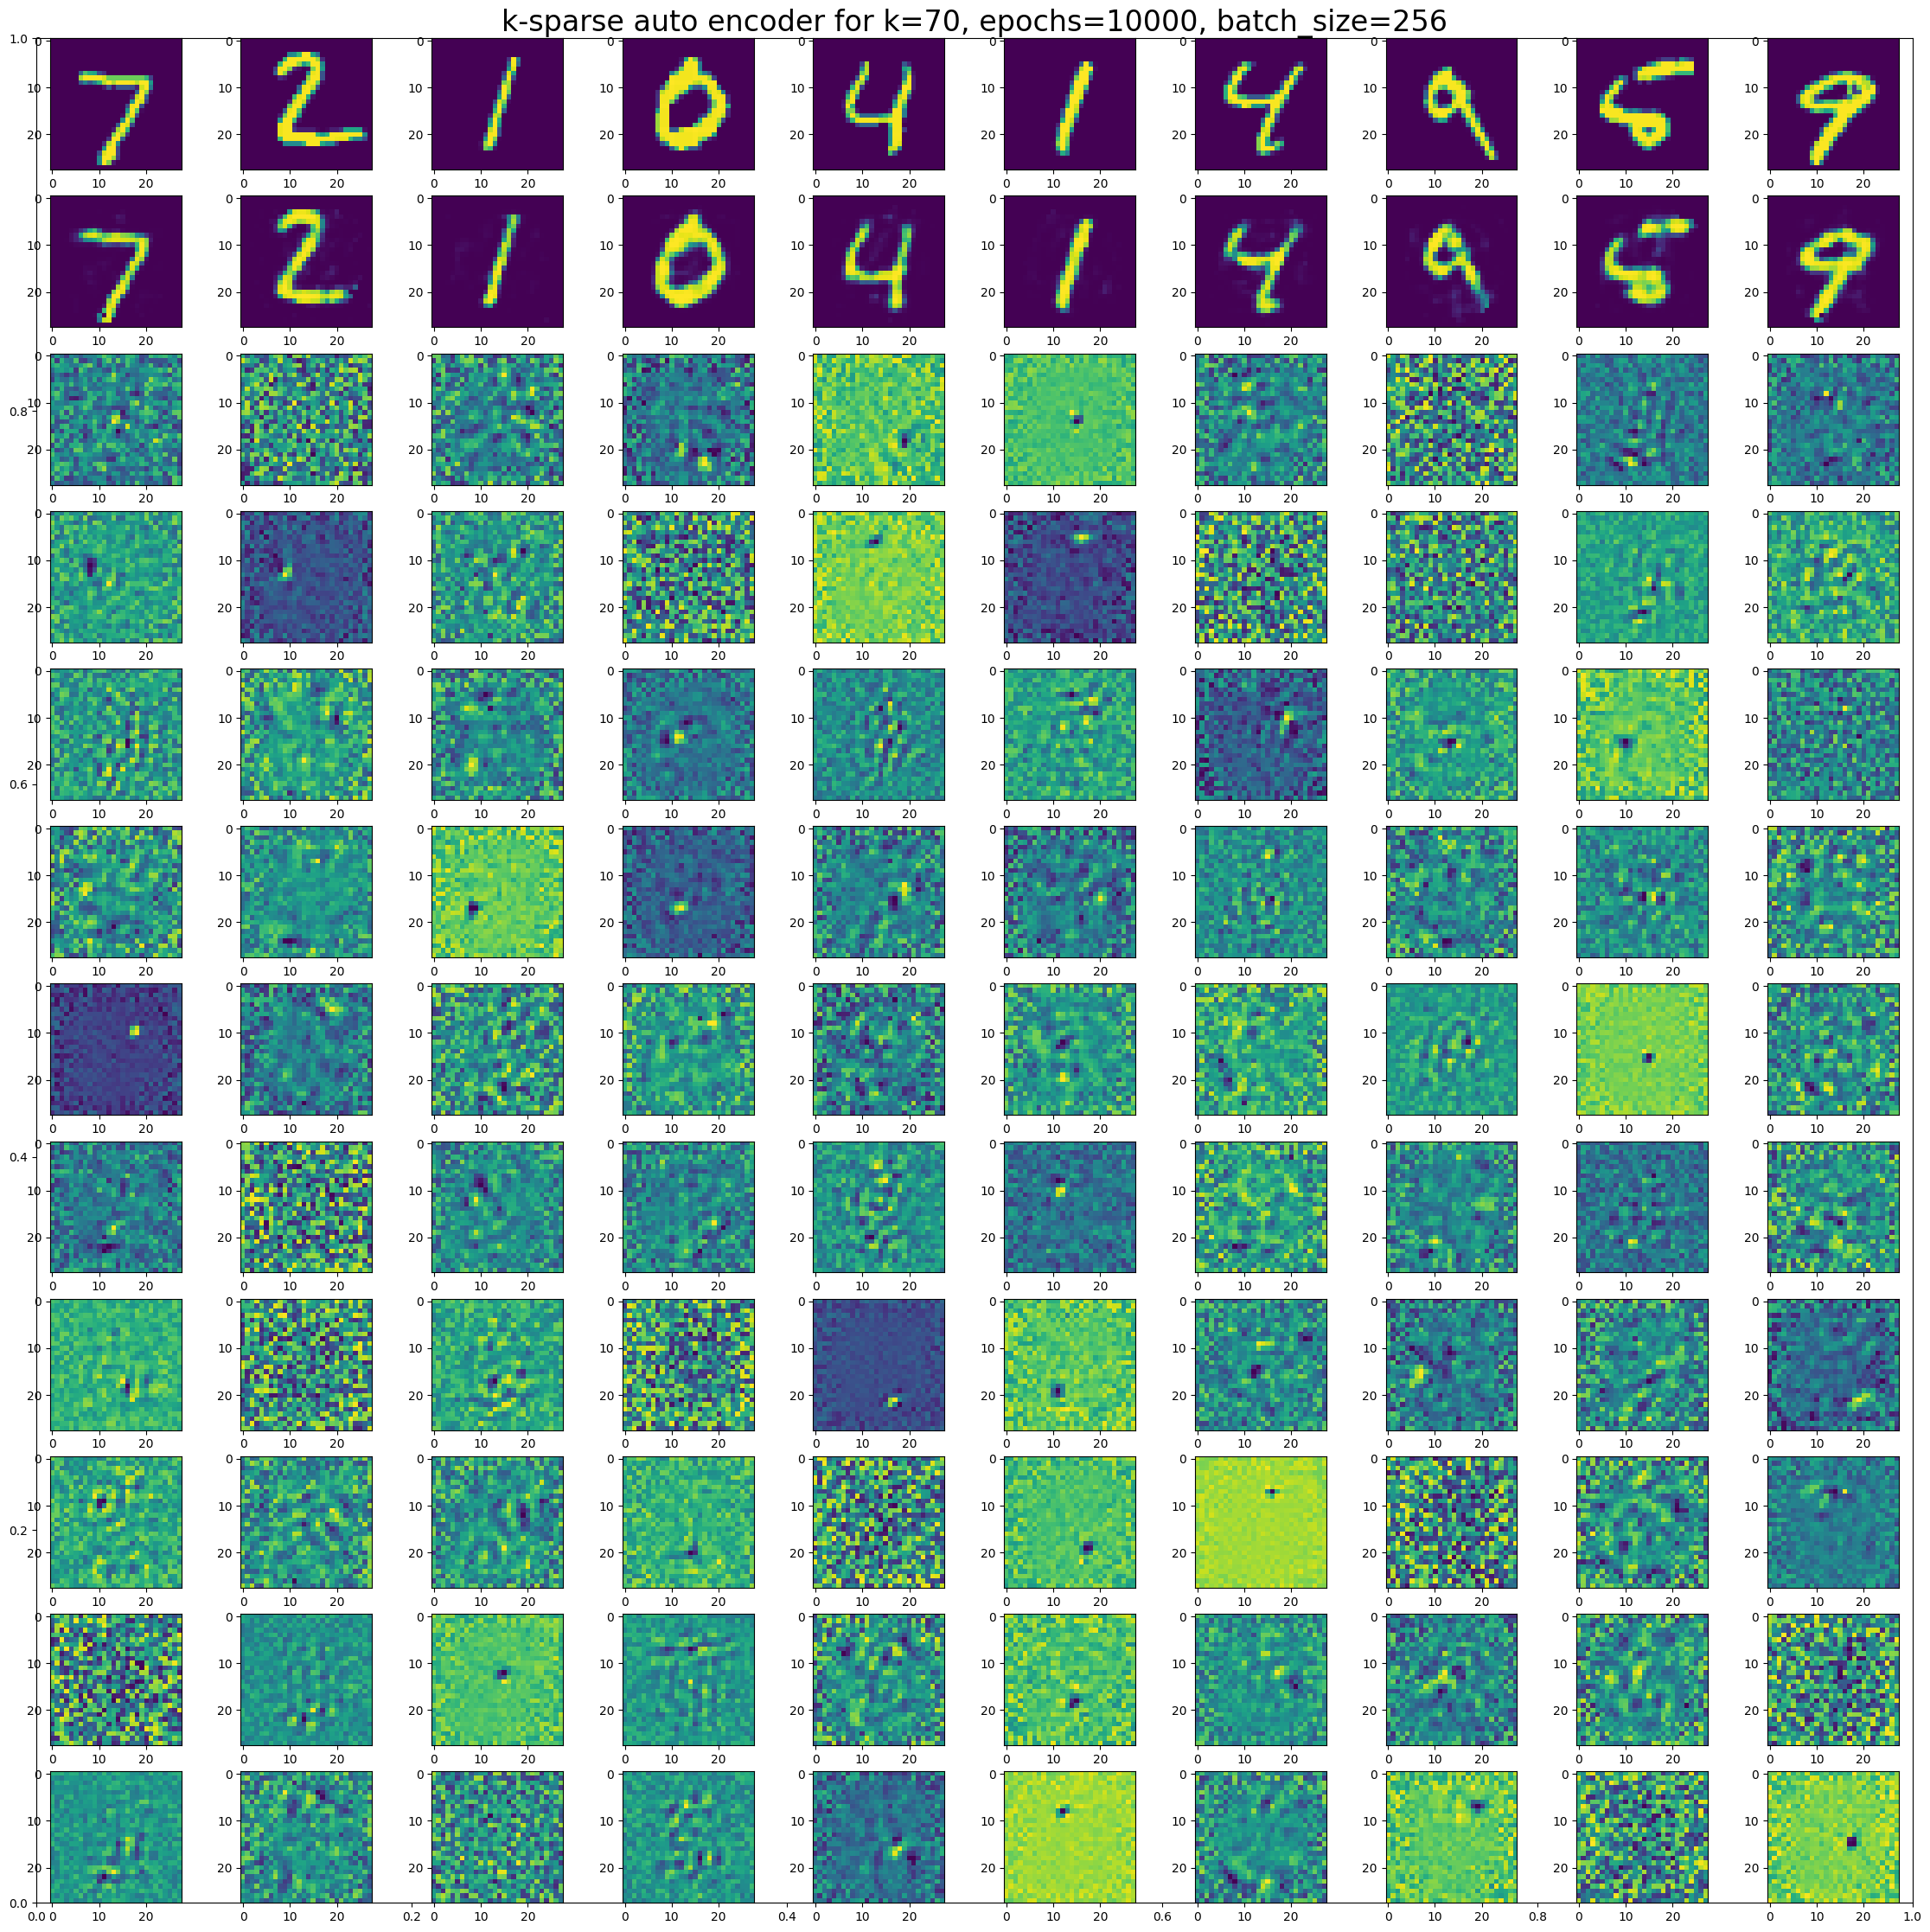

In [ ]:





# Calculate Silhouette Score
silhouette_avg = silhouette_score(selected_data, kmeans_labels)

# Plot the silhouette score and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Plot
ax1.bar(['Accuracy'], [accuracy])
ax1.set_title('K-Means Accuracy')
ax1.set_ylabel('Score')
ax1.set_ylim(0, 1.05)
ax1.text('Accuracy', accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

# Silhouette Score Plot
ax2.bar(['Silhouette Score'], [silhouette_avg], color='orange')
ax2.set_title('K-Means Silhouette Score')
ax2.set_ylabel('Score')
ax2.set_ylim(-1, 1.05)
ax2.text('Silhouette Score', silhouette_avg, f'{silhouette_avg:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('kmeans_performance.png')

print(f"K-Means clustering on the selected data (digits 3 and 8) has been performed.")
print(f"Number of selected samples: {len(selected_data)}")
print(f"The number of clusters used was: {kmeans.n_clusters}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

In [ ]:



output_samples.shape


(10, 784)